In [5]:
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [9]:
from evaluation.evaluate_script import graph_eval_ranking_ds_nodes, graph_eval_ranking_first_nodes, get_query_counts, get_mr_metrics_triples
import os
import json
import pickle

file = "/home/kardosp/continuethelist/outputs/graphwalk_v2_output_sample4.pickle"

with open(file, "rb") as f:
    algo_results = pickle.load(f)

In [10]:
metrics, ranks, query_sizes = graph_eval_ranking_ds_nodes(algo_results, "explanation", True)

100%|█████████████████████████████████████████| 250/250 [08:58<00:00,  2.16s/it]


In [11]:
metrics

(5.825174825174825,
 0.7561983002211421,
 [0.357429718875502, 0.5341365461847389, 0.5421686746987951],
 106)

In [7]:
ranks

[2,
 2,
 1,
 1,
 3,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 2,
 -1,
 -1,
 -1,
 1,
 -1,
 4,
 2,
 4,
 -1,
 1,
 28,
 118,
 1,
 1,
 -1,
 4,
 -1,
 2,
 1,
 2,
 1,
 3,
 2,
 -1,
 335,
 6,
 2,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 2,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 2,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 4,
 -1,
 1,
 1,
 1,
 2,
 -1,
 1,
 2,
 -1,
 2,
 1,
 5,
 -1,
 -1,
 1,
 -1,
 -1,
 35,
 2,
 3,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 2,
 -1,
 13,
 1,
 2,
 -1,
 1,
 1,
 3,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 2,
 -1,
 2,
 1,
 -1,
 -1,
 1,
 2,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 19,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 2,
 -1,
 25,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 2,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 2,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 2,
 5,
 -1,
 -1,
 1,
 -1,
 3,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 3,
 10,
 -1,
 -1,
 -1,
 -1,
 3,
 -1,
 1,
 2,
 -1,
 1,
 1,
 2,
 1,
 -1

In [12]:
import matplotlib.pyplot as plt
import numpy as np

(array([106.,   0.,  89.,  28.,   9.,   4.,   3.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-1.        , -0.04761905,  0.9047619 ,  1.85714286,  2.80952381,
         3.76190476,  4.71428571,  5.66666667,  6.61904762,  7.57142857,
         8.52380952,  9.47619048, 10.42857143, 11.38095238, 12.33333333,
        13.28571429, 14.23809524, 15.19047619, 16.14285714, 17.0952381 ,
        18.04761905, 19.        ]),
 <BarContainer object of 21 artists>)

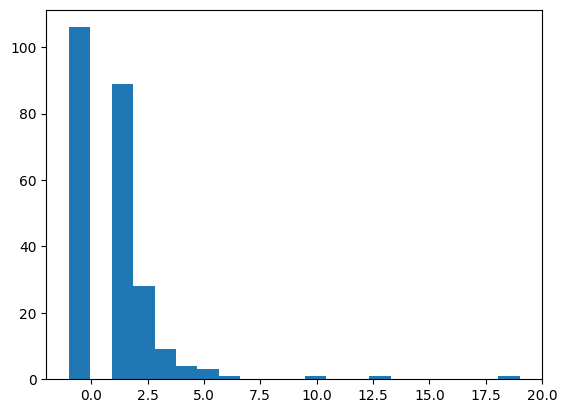

In [13]:
plt.hist(list(filter(lambda x: x<20, ranks)), bins=21)
# plt.hist(ranks, bins=40)
# plt.gca().set_xscale("log")

# Examples

In [14]:
i = 4
record = algo_results[i]
res = graph_eval_ranking_first_nodes(record["graph"], record["explanation"], True)

In [17]:
res[1][:ranks[i]]

[[[['?as', 'http://dbpedia.org/ontology/author', '?uri'],
   ['?as',
    'http://dbpedia.org/property/magazine',
    'http://dbpedia.org/resource/Jump_Square']],
  25],
 [[['?au', 'http://dbpedia.org/ontology/author', '?uri'],
   ['?au',
    'http://dbpedia.org/ontology/magazine',
    'http://dbpedia.org/resource/Jump_Square']],
  30],
 [[['?ai', 'http://dbpedia.org/property/author', '?uri'],
   ['?ai',
    'http://dbpedia.org/property/magazine',
    'http://dbpedia.org/resource/Jump_Square']],
  41]]

In [34]:
res[1][:3]

[[[['?as', 'http://dbpedia.org/ontology/author', '?uri'],
   ['?as',
    'http://dbpedia.org/property/magazine',
    'http://dbpedia.org/resource/Jump_Square']],
  25],
 [[['?au', 'http://dbpedia.org/ontology/author', '?uri'],
   ['?au',
    'http://dbpedia.org/ontology/magazine',
    'http://dbpedia.org/resource/Jump_Square']],
  30],
 [[['?ai', 'http://dbpedia.org/property/author', '?uri'],
   ['?ai',
    'http://dbpedia.org/property/magazine',
    'http://dbpedia.org/resource/Jump_Square']],
  41]]

# How big the Rank 1 groups?

In [18]:
import numpy as np

rank1_sizes = list()
for item in query_sizes:
    # TODO - calculate top1 rank size
    res_size = item[0][1]
    size = 0
    for query in item:
        if query[1] == res_size:
            size += 1
        else:
            break
    rank1_sizes.append(size)

print("Average Rank 1 size", np.mean(rank1_sizes))

Average Rank 1 size 13.63855421686747
